In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from nilearn.image import mean_img
from nilearn import plotting

/home/parietal/hrichard/.local/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


2719


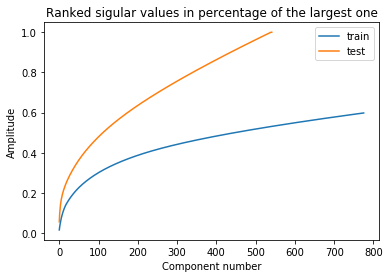

In [2]:
svd_train_path = "/storage/workspace/hrichard/M2_internship/cache_forrest/k_20/svd_train.npy"
S_train = np.load(svd_train_path)
plt.figure()
plt.title("Ranked sigular values in percentage of the largest one")
plt.ylabel("Amplitude")
plt.xlabel("Component number")
plt.plot(np.cumsum(S_train)[:776] / S_train.sum(), label="train")
svd_test_path = "/storage/workspace/hrichard/M2_internship/cache_forrest/k_20/svd_test.npy"
S_test = np.load(svd_test_path)
plt.plot(np.cumsum(S_test)[:2719] / S_test.sum(), label="test")
plt.legend()
print(len(S_train))

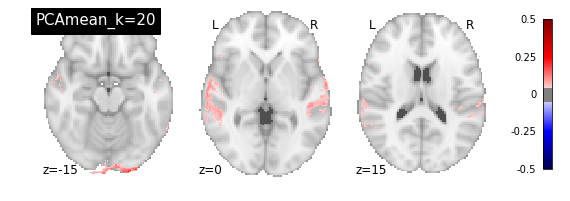

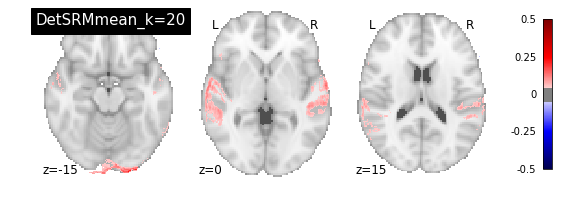

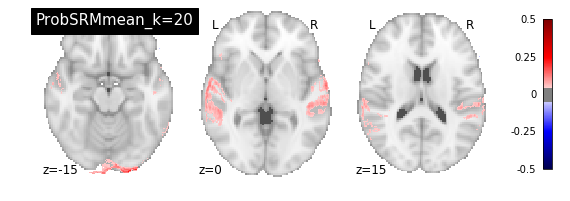

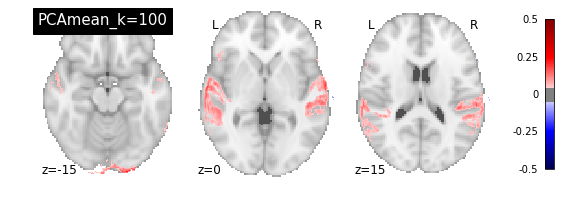

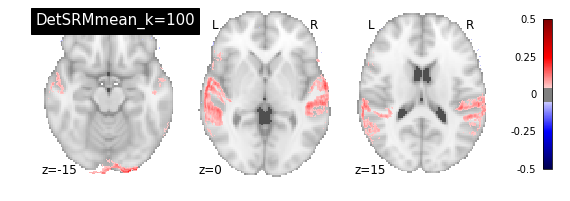

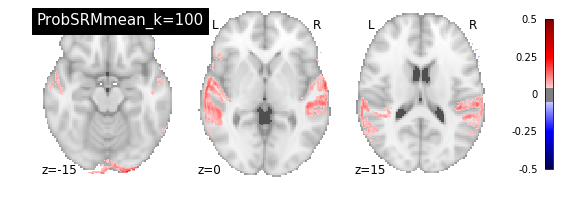

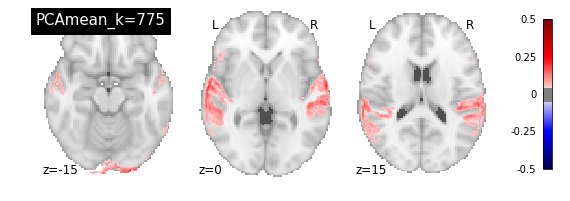

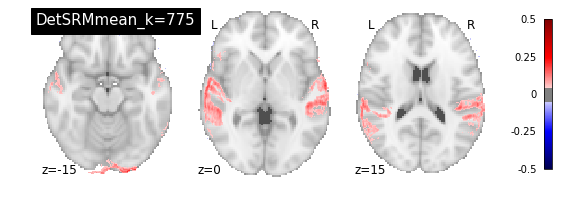

In [3]:
#Results depending on components
subjects = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
# Results
# Results
res = {}
res2 = {}
for k in [20, 100, 775]:
    for algo in ["PCA", "DetSRM", "ProbSRM"]:
        algo_paths = glob("/storage/workspace/hrichard/M2_internship/results/exp10/k_%i/"%k + 
                             "forrestalignment*_algo"+algo+"subject_*")
        if len(algo_paths) > 0:
            m_img = mean_img(algo_paths)
            
            plotting.plot_stat_map(m_img,
                    cut_coords=[-15, 0, 15],
                    display_mode="z",
                    draw_cross=False,
                    vmax=0.5,
                    threshold=0.05,
                    title=algo + "mean_k=" + str(k),
                    cmap="seismic"
                    )

In [4]:
#Results depending on components
subjects = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
# Results
# Results
res = {}
res2 = {}
for k in range(1, 776):
    for algo in ["PCA", "DetSRM", "ProbSRM"]:
        algo_paths = glob("/storage/workspace/hrichard/M2_internship/results/exp10/k_%i/"%k + 
                             "forrestalignment*_algo"+algo+"subject_*")
        if len(algo_paths) > 0:
            m_img = mean_img(algo_paths)
            
            #plotting.plot_stat_map(m_img,
             #       cut_coords=[-15, 0, 15],
              #      display_mode="z",
               #     draw_cross=False,
                #    vmax=0.5,
                 #   title=algo + "mean_k=" + str(k),
                  #  cmap="seismic"
                   # )
            # Quantitative score
            X = m_img.get_data()
            res[algo, k] = len(X[X>0.05])
            res2[algo, k] = np.mean(X)

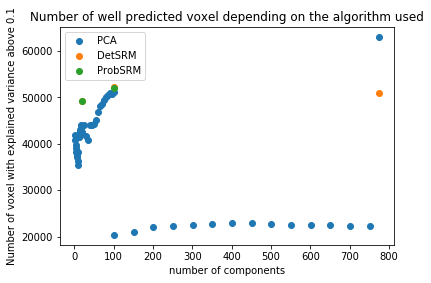

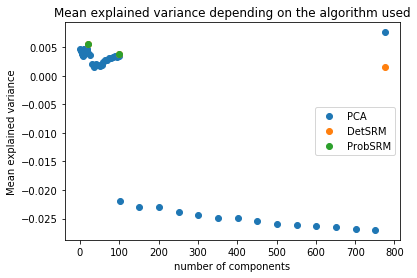

In [5]:
plt.figure()
plt.title("Number of well predicted voxel depending on the algorithm used")
for algo in ["PCA", "DetSRM", "ProbSRM"]:
    xk = []
    yk = []
    for key, value in res.items():
        if key[0] == algo:
            xk.append(key[1])
            yk.append(value)
    plt.plot(np.array(xk), np.array(yk),'o', label=algo)
plt.legend()
plt.ylabel("Number of voxel with explained variance above 0.1")
plt.xlabel("number of components")

plt.figure()
plt.title("Mean explained variance depending on the algorithm used")
for algo in ["PCA", "DetSRM", "ProbSRM"]:
    xk = []
    yk = []
    for key, value in res2.items():
        if key[0] == algo:
            xk.append(key[1])
            yk.append(value)
    plt.plot(np.array(xk), np.array(yk),'o', label=algo)
plt.legend()
plt.ylabel("Mean explained variance")
plt.xlabel("number of components")
plt.legend()